In [65]:
import tensorflow as tf
import librosa
import librosa.display
import numpy as np
import scipy as sp
import IPython.display as ipd

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

## Работа с данными

### Вывод аудио


In [67]:
ipd.Audio('Агапова.wav')

### Загрузка аудиофайла

In [68]:
x, sr = librosa.load('Агапова.wav')

### Вывод графика

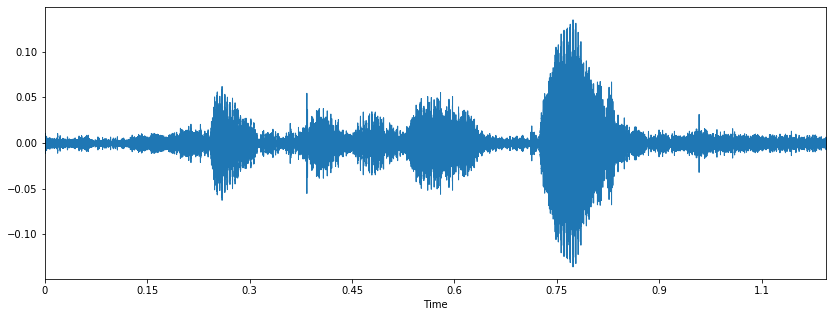

In [69]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Вывод спектрограммы

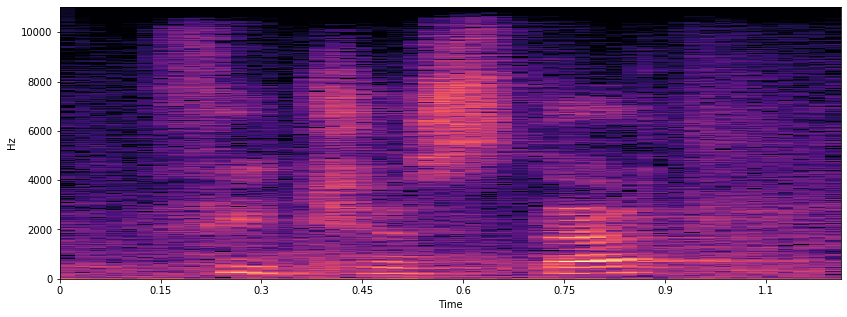

In [70]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

### Создание чистого тона

In [71]:
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x_440 = 0.5*np.sin(2*np.pi*440*t) # pure sine wave at 440 Hz

In [75]:
ipd.Audio(x_440, rate=sr)

## Data augumentation

### Noise Injection

In [81]:
def noise_injection(x, noise_factor):
    noise = np.random.randn(len(x))
    augmented_x = x + noise_factor * noise
    # Cast back to same data type
    augmented_x = augmented_x.astype(type(x[0]))
    return augmented_x

In [93]:
x_noisy = noise_injection(x, 0.008)
ipd.Audio(x_noisy, rate=sr)

## Сохранение записи

In [96]:
librosa.output.write_wav('Агапова_noisy.wav', x_noisy, sr)

### Shifting Time

In [116]:
def shifting_time(x, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_x = np.roll(x, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_x[:shift] = 0
    else:
        augmented_x[shift:] = 0
    return augmented_x

In [118]:
x_shifted = shifting_time(x, sr, 1, 'left')
ipd.Audio(x_shifted, rate=sr)

### Changing Pitch

In [121]:
def changing_pitch(x, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(x, sampling_rate, pitch_factor)

In [126]:
x_pitch_shifted = changing_pitch(x, sr, -5)
ipd.Audio(x_pitch_shifted, rate=sr)

### Changing Speed

In [127]:
def changing_speed(x, speed_factor):
    return librosa.effects.time_stretch(x, speed_factor)

In [132]:
x_changed_speed = changing_speed(x, 0.5)
ipd.Audio(x_changed_speed, rate=sr)